# Compute and visualize the principal components available from uXRF mapping
### uXRF: Bruker M4 tornado 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read XRF text files, reshape to vectors

In [2]:
#Create list of files to open.
files = glob.glob('Data/test/*.txt')
#Open list of files
xrf = pd.DataFrame()
dfShape =xrf.shape
for x in files:
    df = pd.DataFrame(pd.read_csv(x, header=None,sep=";")).iloc[:210,120:]
    dfShape =df.shape
    df=pd.DataFrame(df.values.ravel())
    xrf=pd.concat([xrf, df], axis=1)
xrf.columns=files
X=xrf.values
X.shape
xrf

,Data/test\MassPercent__Br.txt,Data/test\MassPercent__Ca.txt,Data/test\MassPercent__Cr.txt,Data/test\MassPercent__Cu.txt,Data/test\MassPercent__Fe.txt,Data/test\MassPercent__K.txt,Data/test\MassPercent__Mn.txt,Data/test\MassPercent__Rb.txt,Data/test\MassPercent__Rh.txt,Data/test\MassPercent__Si.txt,Data/test\MassPercent__Sr.txt,Data/test\MassPercent__Ti.txt,Data/test\MassPercent__Zn.txt,Data/test\MassPercent__Zr.txt
0,0.000,9.421,0.455,3.946,74.903,7.422,0.232,0.000,0.0,0.000,0.000,1.959,1.660,0.0
1,0.000,6.320,0.125,1.028,85.203,3.336,0.632,0.000,0.0,0.000,0.000,1.804,1.550,0.0
2,0.293,8.560,0.223,1.907,74.986,4.892,0.708,0.000,0.0,0.000,0.391,4.074,3.967,0.0
3,1.660,10.950,0.665,3.275,71.516,3.909,0.952,0.000,0.0,0.000,0.000,3.461,3.607,0.0
4,0.000,6.082,0.012,1.770,62.837,7.755,0.671,0.000,0.0,14.963,0.000,4.431,1.474,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,0.031,5.353,0.104,0.668,84.694,1.843,1.331,0.494,0.0,0.000,0.745,4.004,0.732,0.0
48296,0.150,7.788,0.000,1.517,81.556,2.063,1.419,0.641,0.0,0.000,0.391,2.506,1.971,0.0
48297,0.027,6.903,0.293,2.121,77.888,5.927,1.462,0.000,0.0,0.000,0.000,3.494,1.880,0.0
48298,0.000,5.960,0.146,0.546,81.099,6.918,1.523,0.000,0.0,0.000,0.000,2.081,1.724,0.0


## Compute the PC transforms

Text(0.5, 1.0, 'Variance explained by successive PCs')

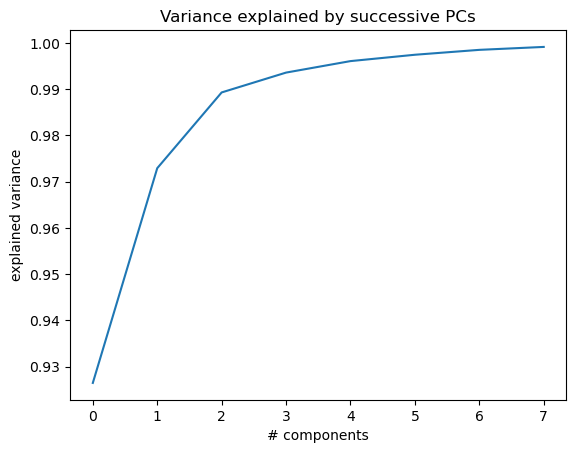

In [3]:
num_components = 8

#Scale data using standardscaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled = X#scaler.transform(X)

#Calculate increase in var explained as fxn of principal components
pca_15=PCA(n_components=num_components,random_state=2022)
pca_15.fit(X_scaled)
X_pca_15=pca_15.transform(X_scaled)
#Plot increase in var explained as fxn of principal components
plt.plot(np.cumsum(pca_15.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('explained variance')
plt.title('Variance explained by successive PCs')

## Print Factor Loadings

In [4]:
loadings = pd.DataFrame(pca_15.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'], index=xrf.columns)
loadings[:5]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Data/test\MassPercent__Br.txt,-0.004193,0.004318,0.009030,0.041643,0.049342,-0.003933,0.102017,0.666664
Data/test\MassPercent__Ca.txt,-0.005139,0.326158,0.731163,-0.461945,-0.145379,0.006116,-0.112213,-0.138147
Data/test\MassPercent__Cr.txt,-0.000875,0.003957,0.001533,0.010148,0.008999,0.012019,-0.014019,0.041442
Data/test\MassPercent__Cu.txt,-0.015674,0.003780,0.017697,0.203689,0.503353,0.705710,-0.290510,-0.162431
Data/test\MassPercent__Fe.txt,-0.674892,-0.549671,-0.133807,-0.277293,-0.180284,0.002866,-0.087195,-0.127273


# Visualize the signal within each principal component

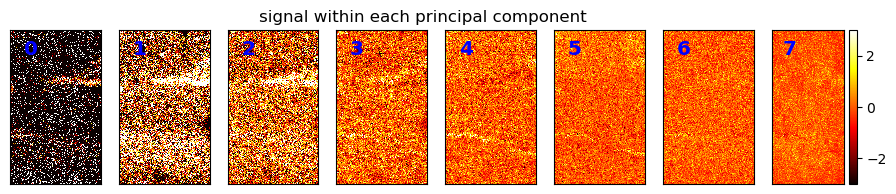

In [5]:
fig, ax = plt.subplots(1,8, figsize=(11,2))
for x in range(num_components):
    Z = X_pca_15[:,x].reshape(dfShape).T
    im=ax[x].imshow(Z, interpolation='none', aspect='auto',cmap='hot')
    im.set_clim(-3, 3)
    ax[x].axes.xaxis.set_visible(False)
    ax[x].axes.yaxis.set_visible(False)
    ax[x].text(.15, .84, str(x), transform=ax[x].transAxes, fontsize='x-large',fontweight='heavy',color='blue')
plt.colorbar(im)
plt.suptitle('signal within each principal component')
plt.show()
    